Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [63]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 
import datetime as dt
from grader import Grader

In [64]:
DATA_FOLDER = '/Users/risbhatia/kaggle-practice/predict-future-sales/data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [65]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [66]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [67]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [68]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [69]:
transactions.head()
#transactions.info()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [70]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%d.%m.%Y')

In [71]:
transactions['year'] = pd.DatetimeIndex(transactions['date']).year
transactions['month'] = pd.DatetimeIndex(transactions['date']).month

In [72]:
transactions['sales'] = transactions['item_price']*transactions['item_cnt_day']

In [73]:
shop_rev = transactions[(transactions['year'] == 2014) & (transactions['month'] == 11)].groupby('shop_id')['sales'].sum()

In [74]:
shop_rev[shop_rev.idxmax()]

10429612.70000016

In [40]:
(transactions['item_cnt_day'] * transactions['item_price'])

Timestamp('2013-01-03 00:00:00')

In [11]:
# YOUR CODE GOES HERE

max_revenue = 100
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 100


In [78]:
items[['item_id', 'item_category_id']].head()

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40


In [81]:
transactions_m = pd.merge(transactions, items[['item_id', 'item_category_id']], how='left', on=['item_id'])

Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [94]:
cat_rev = transactions_m[(transactions_m['year'] == 2014) & (transactions_m['month'].isin([6,7,8]))].groupby('item_category_id')['sales'].sum()

In [98]:
cat_rev.idxmax()

20

In [97]:
cat_rev[cat_rev.idxmax()]

32157302.430000115

In [100]:
item_categories[item_categories['item_category_id'] == 20]

,item_category_name,item_category_id
20,Игры - PS4,20


In [ ]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [104]:
item_series = transactions.groupby('item_id')['item_price'].value_counts()

In [105]:
item_series[item_series == 1].shape

(54549,)

In [ ]:
# YOUR CODE GOES HERE

num_items_constant_price = # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

In [111]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,sales
0,2013-01-02,0,59,22154,999.00,1.0,2013,1,999.00
1,2013-01-03,0,25,2552,899.00,1.0,2013,1,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,2013,1,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,2013,1,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,1099.00


/Users/risbhatia/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


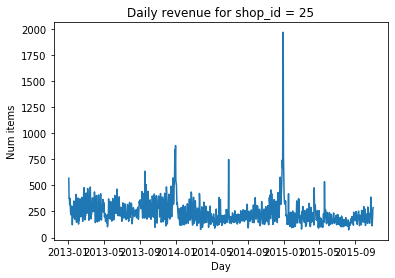

In [118]:
shop_id = 25

total_num_items_sold = item_cnt_day_series.values
days = item_cnt_day_series.index

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

# total_num_items_sold_var = # PUT YOUR ANSWER IN THIS VARIABLE
# grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

In [119]:
np.var(total_num_items_sold)

13069.0151380903

In [113]:
item_cnt_day_series = transactions[transactions['shop_id'] == 25].groupby('date')['item_cnt_day'].sum()

In [117]:
item_cnt_day_series.values

array([568., 375., 377., ..., 190., 275., 287.])

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

## Clean up the code and write down functions revised

In [ ]:
STUDENT_EMAIL = # EMAIL HERE
STUDENT_TOKEN = # TOKEN HERE
grader.status()

In [ ]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Well done! :)